# Volume 4: Predator-Prey Models
    Benj McMullin
    Math 437
    10/11/2023

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Problem 1

The `solve_ivp` solver requires a callable function representing the right hand side of the IVP.

Define the function `predator_prey()` that accepts the current $r(t)$ and $w(t)$ values as a 1d array $y$, the current time $t$, the parameters $\alpha, \beta, \delta$, and $\gamma$,
and returns the right hand side of the ODE as a tuple.

In [8]:
def predator_prey(t, y, alpha = 1., beta = 0.5, gamma = 0.25, delta = 0.75):
    """Compute right hand side of Predator-Prey model based on rabbit and
    wolf populations at given time.
    
    Parameters:
        y ((2, ) ndarray): A vector representing rabbit and wolf populations 
            at time t.
        t (float): Current time.
        
    Returns:
        (tuple): A tuple corresponding to right hand side of the Predator-
            Prey model.
    """
    # return teh predator prey model
    return np.array([y[0] * (alpha - beta * y[1]),  y[1] * (-delta + gamma * y[0])])

In [9]:
predator_prey(0, [5,3])

array([-2.5,  1.5])

# Problem 2

Use solve_ivp to solve the predator-prey model ODE with initial conditions (r0 , w0 ) = (5, 3) and time ranging from 0 to 20 years. 
Use $\alpha=1.0$, $\beta=0.5$, $\delta=0.75$, and $\gamma=0.25$ as your growth parameters.
Display the resulting rabbit and wolf populations over time (stored as columns in the output of solve_ivp) on the same plot.

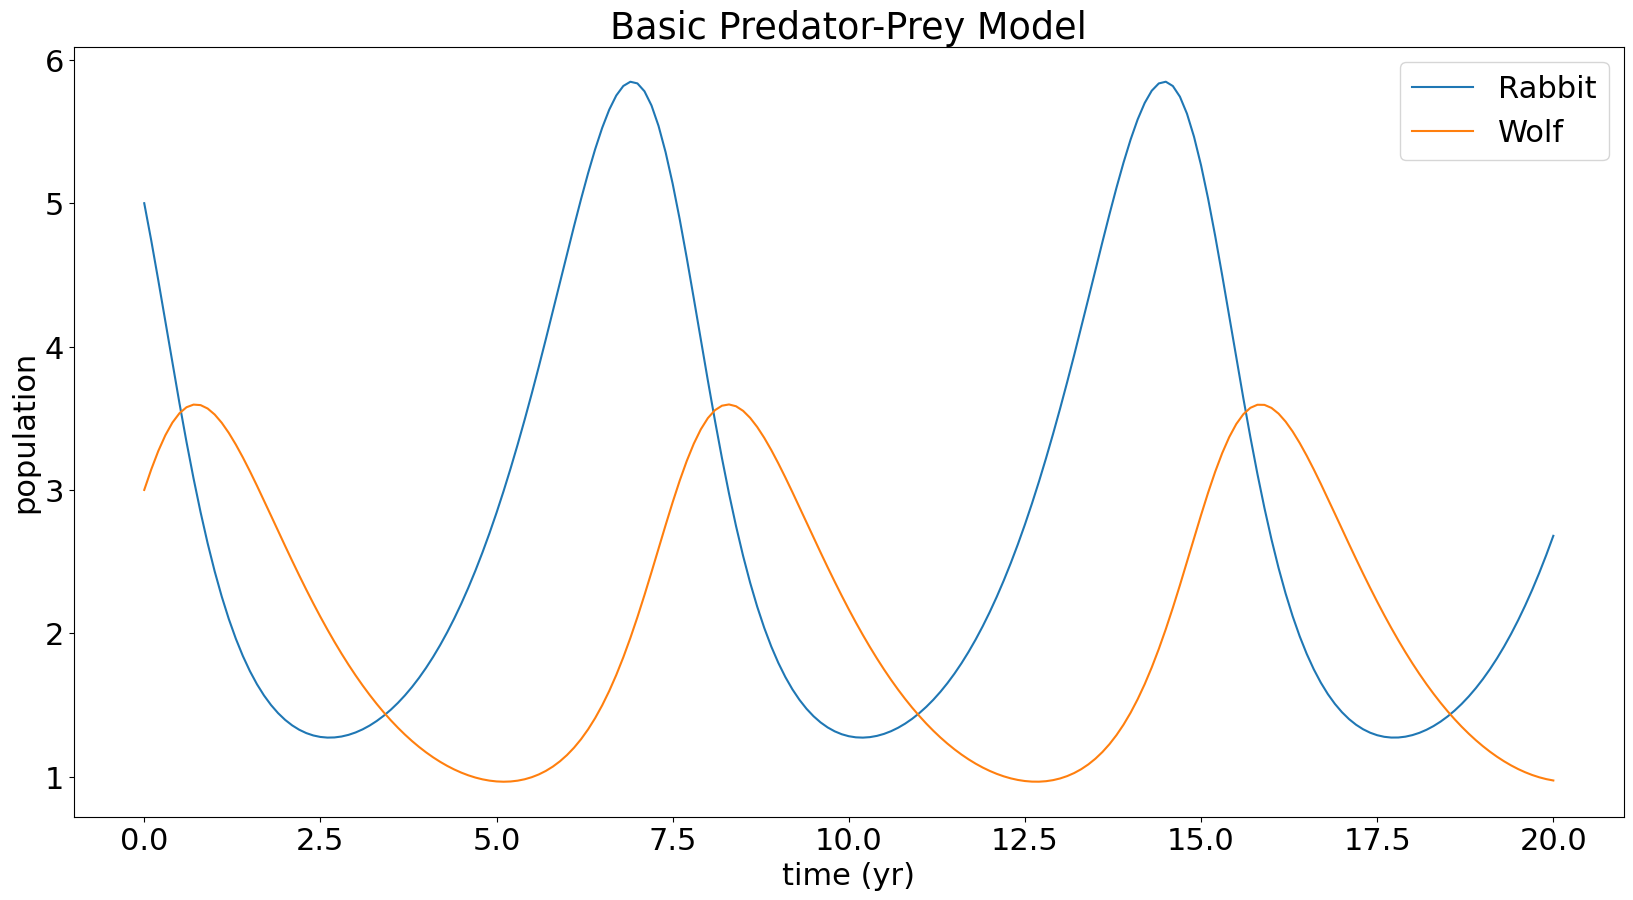

In [10]:
# initial conditions
y0 = np.array([5., 3.])
t_span = (0, 20)

# solve the IVP
sol = solve_ivp(predator_prey, t_span, y0, max_step = 0.1)

plt.rcParams.update({'font.size': 22})
plt.rcParams["figure.figsize"] = (20, 10) #make plots big

# plot solution
plt.plot(sol.t, sol.y[0], label = 'Rabbit')
plt.plot(sol.t ,sol.y[1], label = 'Wolf')
plt.xlabel('time (yr)')
plt.ylabel('population')
plt.title('Basic Predator-Prey Model')
plt.legend()
plt.show()

# Problem 3

Similar to Problem 1, define a function `lotka_volterra()` that takes in the current time $t$, the current predator and prey populations as a 1d array $y$, and the growth parameter $\eta$, and returns the right hand side of the nondimensional Lotka-Volterra system.

Plot the phase portrait and several solutions of this ODE for $\eta=1/3$.
Using `solve_ivp`, solve the ODE with three different initial conditions $y_0 = (1/2, 1/3)$, $y_0=(1/2, 3/4)$, and $y_0=(1/16, 3/4)$ and time domain $t = [0,13]$. Plot these three solutions on the same graph as the phase portrait.
Also plot the equilibria $(0,0)$ and $(1,1)$ as points.

Since your solutions are being plotted with the phase portrait, plot the two populations against each other (instead of both individually against time). Compare your result with the example in the lab PDF.

In [11]:
def lotka_volterra(t, y, eta = 1/3):
    """Compute right hand side of Lotka Volterra Predator-Prey model based 
    on rabbit and wolf populations at given time.
    
    Parameters:
        y ((2, ) ndarray): A vector representing rabbit and wolf populations 
            at time t.
        t (float): Current time.
        eta (float): The model parameter.
        
    Returns:
        (tuple): A tuple corresponding to right hand side of the Lotka 
            Volterra Predator-Prey model.
    """
    # return right hand side of Lotka Volterra Predator-Prey model.
    return np.array([y[0] * (1 - y[1]), (y[0] - 1) * eta])

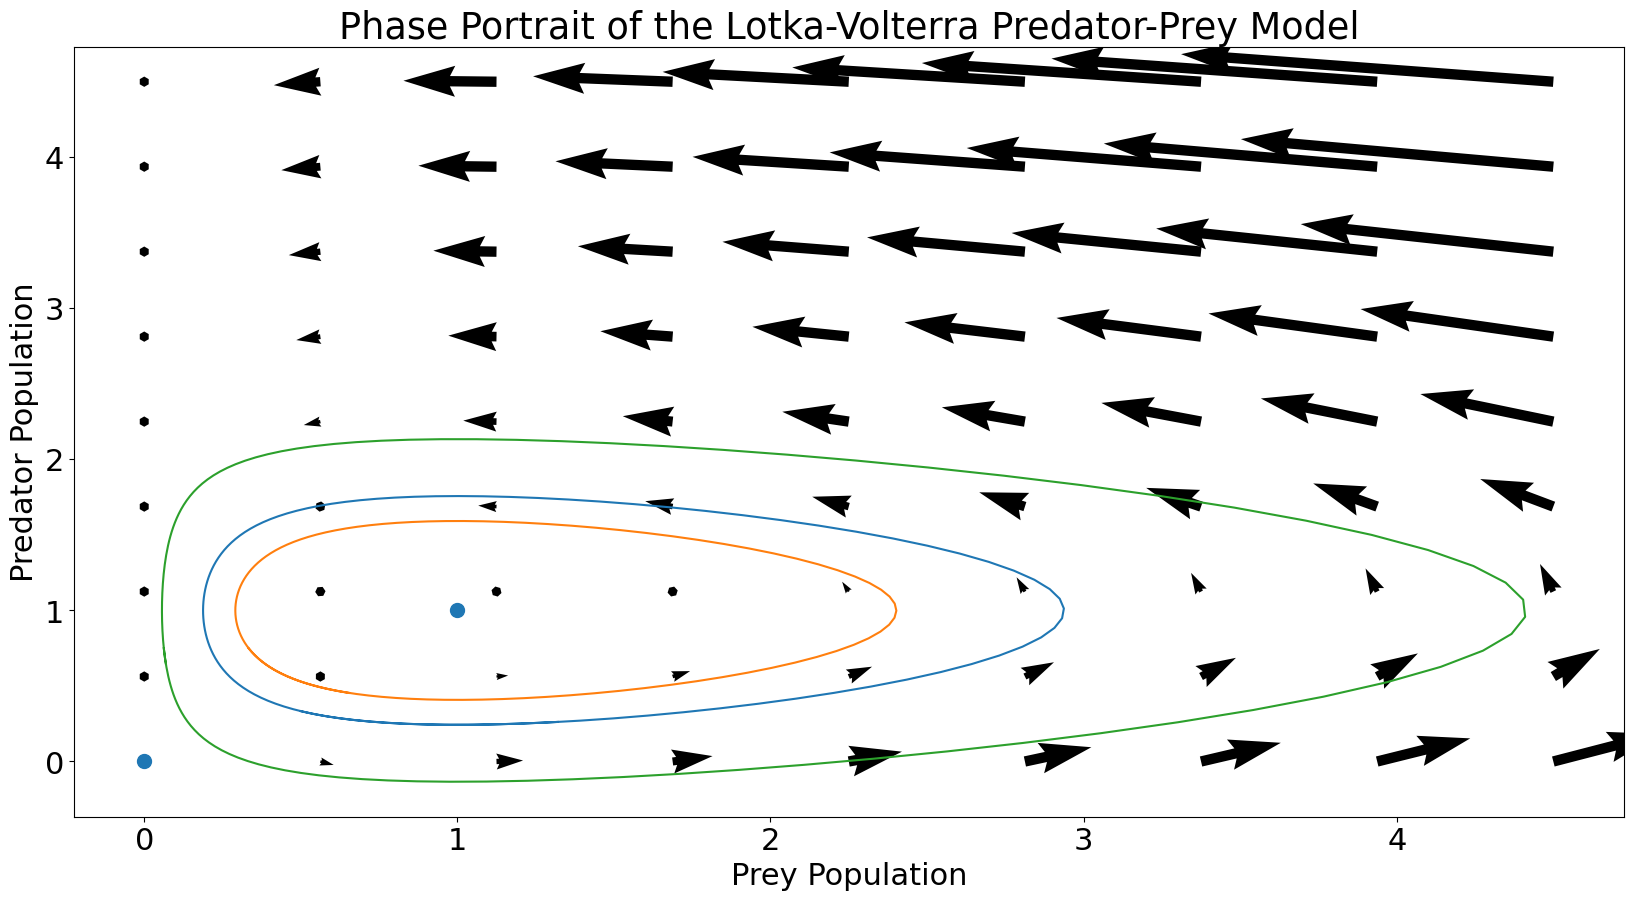

In [12]:
# Initial conditions
y01 = (1 / 2, 1 / 3)
y02 = (1 / 3, 3 / 4)
y03 = (1 / 16, 3 / 4)
t_span = (0, 13)

sol1 = solve_ivp(lotka_volterra, t_span, y01, max_step = 0.1)
sol2 = solve_ivp(lotka_volterra, t_span, y02, max_step = 0.1)
sol3 = solve_ivp(lotka_volterra, t_span, y03, max_step = 0.1)

# Make a meshgrid of points in the domain of the vector field
Y1, Y2 = np.meshgrid(np.linspace(0, 4.5, 9), np.linspace(0, 4.5, 9))
dU, dV = lotka_volterra(0, (Y1, Y2))
Q = plt.quiver(Y1, Y2, dU, dV)

plt.plot(sol1.y[0], sol1.y[1])#,label='y0 ='+str(y01))
plt.plot(sol2.y[0], sol2.y[1])#,label='y0 ='+str(y02))
plt.plot(sol3.y[0], sol3.y[1])#,label='y0 ='+str(y03))
plt.scatter([0,1], [0,1], s=100)
plt.xlabel('Prey Population')
plt.ylabel('Predator Population')
plt.title('Phase Portrait of the Lotka-Volterra Predator-Prey Model')
plt.show()

# Problem 4

Define a new function `logistic_model()` that takes in the current time $t$, the current predator and prey populations $y$, the parameters $\eta$ and $\rho$, and returns the right hand side of the logistic model ODE as a tuple.

Use `solve_ivp` to compute solutions $(U,V)$ of the ODE
for initial conditions $(1/3, 1/3)$ and $(1/2, 1/5)$ with $(t_0,t_f)=(0,13)$.
Do this for parameter values $\eta=1$, $\rho = 0.3$ and also for values $\eta=1$, $\rho = 1.1$.

Create a phase portrait for the logistic equations for each set of parameter values.
Plot the direction field, all equilibrium points, and both solution orbits on the same plot for each set of parameter values.

Hint: there are three equilibrium points for each set of parameter values.
However, you only need to plot the ones with nonnegative values of $U$ and $V$, as these are the only ones that correspond to physically-meaningful solutions.

In [13]:
def logistic_model(t, y, eta = 1, rho = 0.3):
    """Compute right hand side of Logistic Predator-Prey model based on
    rabbit and wolf populations at given time.
    
    Parameters:
        y ((2, ) ndarray): A vector representing rabbit and wolf populations 
            at time t.
        t (float): Current time.
        eta, rho (floats): Parameters of the system.
        
    Returns:
        (tuple): A tuple corresponding to right hand side of the Logistic 
            Predator-Prey model.
    """
    # nondimensional logistic ode system
    return np.array([ y[0] * (eta - y[0] - y[1]), y[1] * (y[0] - rho)])

def Log_Model2(t, y, eta = 1, rho = 1.1):
    """
    Compute right hand side of Logistic 
    Predator-Prey model based on
    rabbit and wolf populations at given time.
    """

    # nondimensional logistic ode system
    return np.array([y[0] * (1 - y[0] - y[1]), eta * y[1] * (y[0] - rho)])

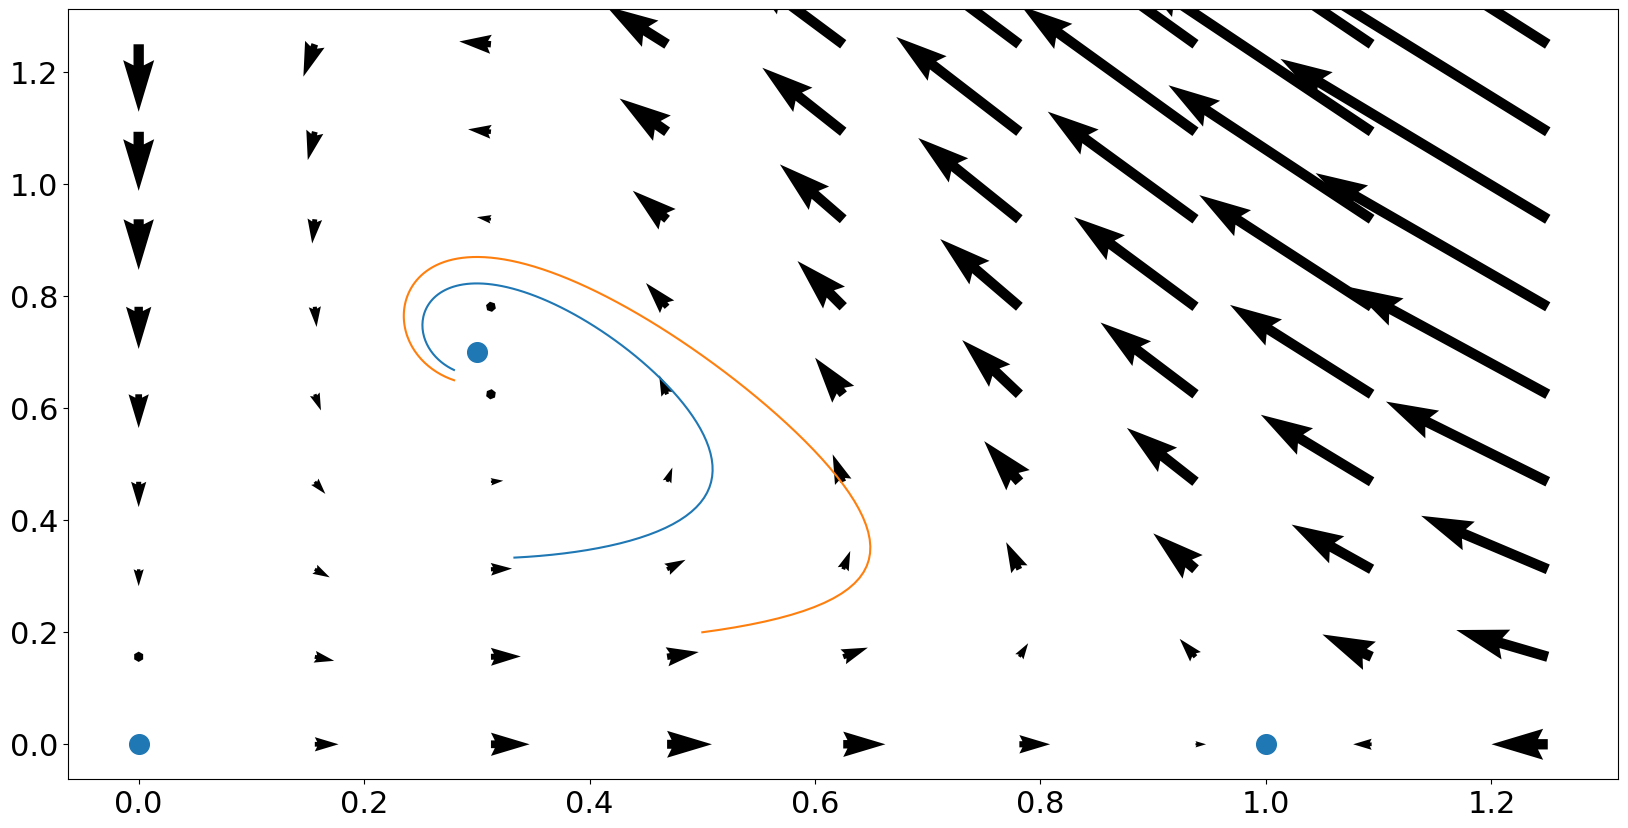

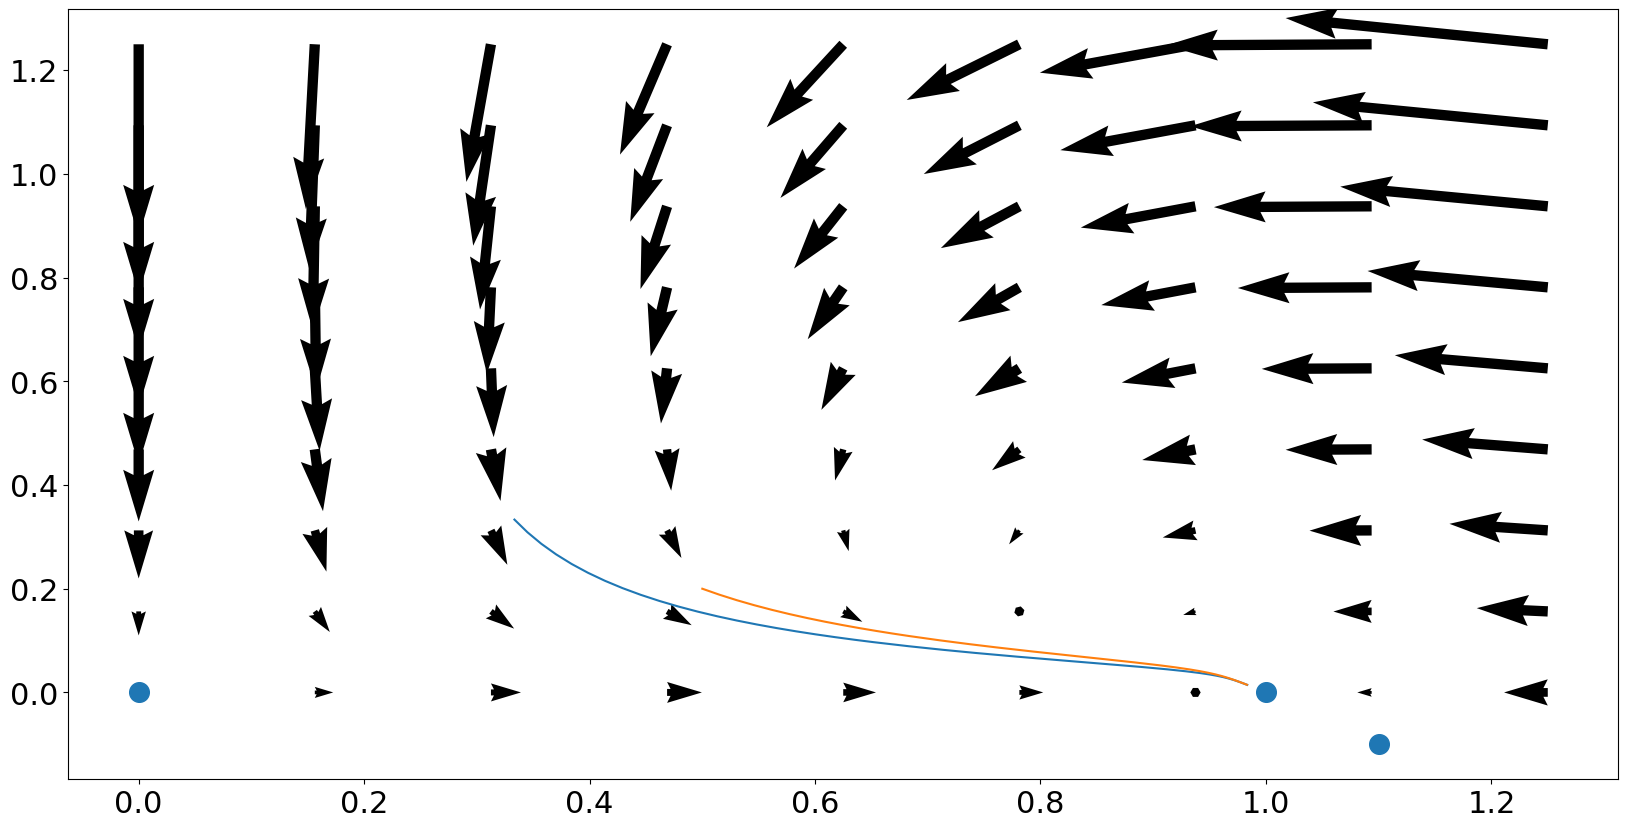

In [14]:
# Setting up initial conditions and time span for a numerical simulation
t_span = (0, 13)

# Initial conditions for two variables
y01 = (1 / 3, 1 / 3)
y02 = (1 / 2, 1 / 5)

# Solving the system of differential equations with the first set of initial conditions (y01) and (y02)
sol1 = solve_ivp(logistic_model, t_span, y01, max_step = 0.1)
sol2 = solve_ivp(logistic_model, t_span, y02, max_step = 0.1)

# Solving the system of differential equations with the second set of initial conditions (y01) and (y02)
sol3 = solve_ivp(Log_Model2, t_span, y01, max_step = 0.1)
sol4 = solve_ivp(Log_Model2, t_span, y02, max_step = 0.1)

# Provided code for plotting phase portrait.
Y1, Y2 = np.meshgrid(np.linspace(0, 1.25, 25), np.linspace(0, 1.25, 25))
dU, dV = logistic_model(0, (Y1, Y2))
Q = plt.quiver(Y1[::3, ::3], Y2[::3, ::3], dU[::3, ::3], dV[::3, ::3])

# equilibrium points are (0,0), (eta, 0), (rho, 1-rho)
plt.scatter( [0, 0.3, 1], [0, 1 - 0.3, 0], s = 200)
plt.plot(sol1.y[0], sol1.y[1])
plt.plot(sol2.y[0], sol2.y[1])
plt.show()

# Provided code for plotting phase portrait.
Y1, Y2 = np.meshgrid(np.linspace(0, 1.25, 25), np.linspace(0, 1.25, 25))
dU, dV = Log_Model2(0, (Y1, Y2))
Q = plt.quiver(Y1[::3, ::3] ,Y2[::3, ::3] ,dU[::3, ::3] ,dV[::3, ::3])

# equilibrium points are (0,0), (eta, 0), (rho, 1-rho)
plt.scatter( [0, 1.1, 1], [0, 1 - 1.1, 0], s = 200)
plt.plot(sol3.y[0], sol3.y[1])
plt.plot(sol4.y[0], sol4.y[1])
plt.show()

# Problem 5

Define a new function `two_prey_species()` that takes in the current time $t$, the current prey and predator populations $y$, the parameters $\alpha,\beta,\eta,\xi$, and $\rho$, and returns the right-hand-side of the two-prey-species model's ODE as a tuple.

Use `solve_ivp` to compute solutions $(U,V,W)$ of this ODE using the initial condition $(1/3,1/3,1/3)$, $(1/2,1/3,1/5)$, and $(1,1/10,1/2)$, with $(t_0,t_f)=(0,25)$.
Use parameter values $\eta=1$, $\rho=0.3$, $\xi=0.5$, $\alpha=0.2$, $\beta=0.1$.
Plot the numerical solutions for the populations as functions against time.

Do the dynamics predicted by this model seem realistic?
Write (in a markdown cell) your answer and reasoning behind it.

In [15]:
def two_prey_species(t, y, alpha, beta, eta, xi, rho):
    """Compute right hand side of two-prey-species predator-prey model based on
        rabbit, elk, and wolf populations at given time.
    
    Parameters:
        y ((3,) ndarray): A vector representing rabbit, elk, and wolf populations 
            at time t.
        t (float): Current time.
        alpha, beta, eta, xi, rho (float): Parameters of the system.
        
    Returns:
        (tuple): A tuple corresponding to right hand side of the model's ODE.
    """
    return np.array([y[0] * (1 - y[0] - y[1] - y[2]), alpha * y[1] * (1 - y[0] - y[1]) - beta * y[1] * y[2], eta * y[2] * (y[0] - xi * y[1] - rho)])

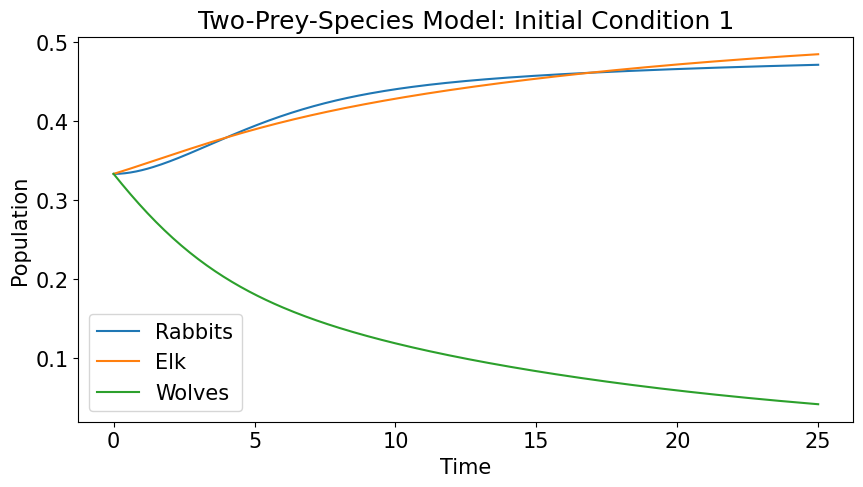

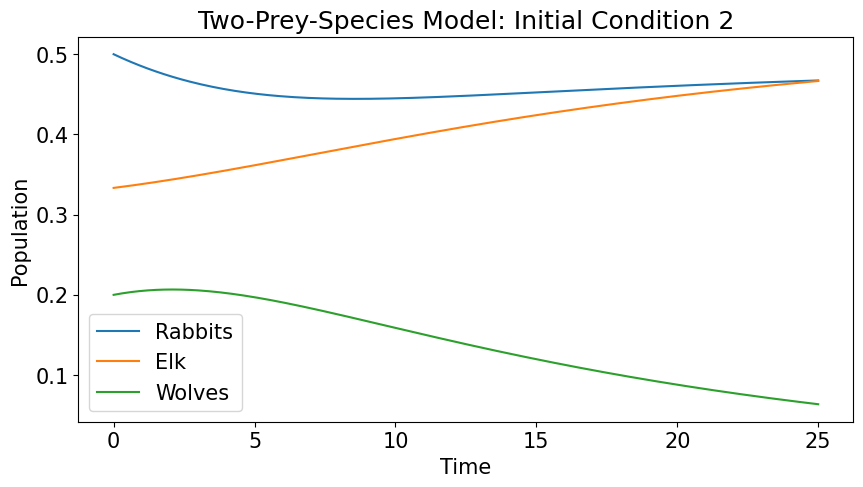

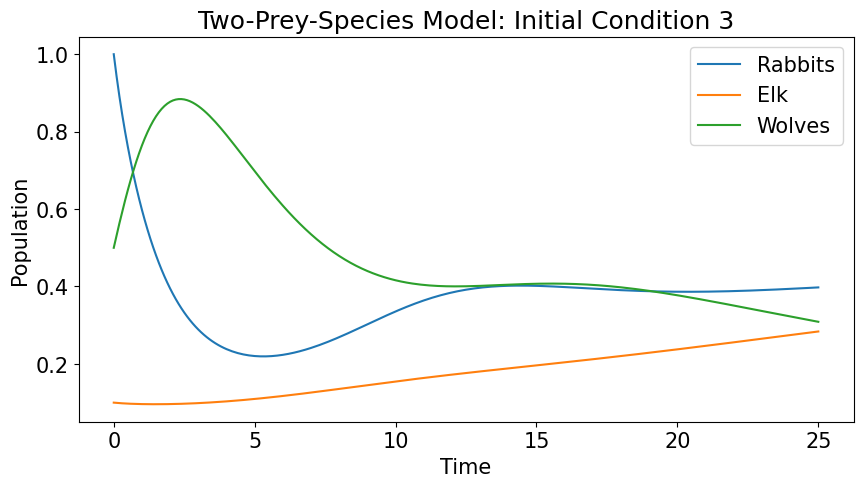

In [16]:
# set parameters
eta = 1
rho = 3 / 10
xi = 1 / 2
alpha = 1 / 5
beta = 1 / 10
t_span = (0, 25)
y01 = (1 / 3, 1 / 3, 1 / 3)
y02 = (1 / 2, 1 / 3, 1 / 5)
y03 = (1, 1 / 10, 1 / 2)
ys = [y01, y02, y03]

# solve ode system
sols = [solve_ivp(two_prey_species, t_span, y, max_step = 0.1, args = (alpha, beta, eta, xi, rho)) for y in ys]

# plot
plt.rcParams["figure.figsize"] = (10, 5)
plt.rcParams.update({'font.size': 15})

for i, sol in enumerate(sols):
    plt.plot(sol.t, sol.y[0], label="Rabbits")
    plt.plot(sol.t, sol.y[1], label="Elk")
    plt.plot(sol.t, sol.y[2], label="Wolves")
    plt.xlabel("Time")
    plt.ylabel("Population")
    plt.title("Two-Prey-Species Model: Initial Condition {}".format(i+1))
    plt.legend()
    plt.show()

### Do the dynamics predicted by this model seem realistic?

Yes